In [990]:
import setup
from circuits import * 
from number import *
import math
import pandas as pd

In [1018]:
def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

In [991]:
def parity(x):
    x = int(np.abs(x))
    if   (x==0):
        return 0
    elif (x % 2 == 1):
        return -1
    else:
        return 1
    
vparity = np.vectorize(parity)

In [1061]:
def generate_dataset(m, k):
    p = primes[k] # dimension of vector
    ords = np.zeros((m,p), dtype=int)

    for i in range(m):
        for j in range(1,p):
            ords[i][j] = order(j, primes[k+i])
    return ords


In [1062]:
m = 100
k = 50

In [1063]:
ords = generate_dataset(m, k)

In [1067]:
rand = np.random.randint(1, p, size=(m,p-1))
for i in range(m):
    rand[i][0] = 0
    rand[i][1] = 1

In [1071]:
ords = pd.DataFrame(ords)
rand = pd.DataFrame(rand)

In [956]:
ords = ords.applymap(parity)
rand = rand.applymap(parity)

In [957]:
from sklearn.metrics.pairwise import pairwise_kernels

In [958]:
K_ord = pairwise_kernels(ords, ords)
K_rand = pairwise_kernels(rand, rand)

In [959]:
plt.imshow(abs(K_ord), cmap="Greys")

In [960]:
plt.imshow(abs(K_rand), cmap="Greys")

In [ ]:
ords_R = ords.reindex(idx)

In [ ]:
K_ord_R = pairwise_kernels(ords_R, ords_R)

In [ ]:
plt.imshow(abs(K_ord_R))

In [ ]:
sums = abs(np.array(ords.apply(sum, axis=1)))

In [977]:
sums[sums.argsort()]

In [978]:
plt.imshow(np.tile(sums[sums.argsort()[::-1]], (100,1)))

In [980]:
ords_R = ords.reindex(sums.argsort())

In [981]:
ords_R.apply(sum, axis=1)

In [982]:
K_ord_R = pairwise_kernels(ords_R, ords_R)

In [983]:
plt.imshow(abs(K_ord_R))

In [ ]:
ords_R.tail(5)

In [1016]:
primes[k+85]-1

In [1019]:
prime_factors(768)

In [1020]:
ords_R.head(5)

In [1021]:
primes[k+12]-1

In [1023]:
prime_factors(306)

# Making rule more complex

In [ ]:
ords

In [ ]:
def parity_3(x):
    x = int(np.abs(x))
    if   (x==0):
        return 0
    elif ((x+1) % 3 == 0):
        return -1
    else:
        return 1
    
vparity_3 = np.vectorize(parity_3)

def cluster(dataset, n):
    X = dataset
    clustering = SpectralClustering(n_clusters=n,
        assign_labels='discretize',
        random_state=0).fit(X)

    labels = clustering.labels_
    idx = labels.argsort()

    #labels[labels.argsort()]

    dataset_R = dataset.reindex(idx)
    return (dataset_R, idx)


In [1079]:
ords = pd.DataFrame(ords)
rand = pd.DataFrame(rand)

In [1080]:
ords = ords.applymap(parity_3)
rand = rand.applymap(parity_3)

In [1083]:
K_ord = pairwise_kernels(ords, ords)
K_rand = pairwise_kernels(rand, rand)

In [1104]:
rand_R = cluster(rand, 2)
K_rand_R = pairwise_kernels(rand_R, rand_R)

In [1102]:
plt.imshow(abs(K_rand), cmap="Greys")

In [1105]:
plt.imshow(abs(K_rand_R), cmap="Greys")

In [1130]:
ords_R = cluster(ords, 9)
K_ords_R = pairwise_kernels(ords_R, ords_R)

In [1101]:
plt.imshow(abs(K_ord), cmap="Greys")

In [1131]:
plt.imshow(abs(K_ords_R))

## Testing correlations with prime factorisation

In [1273]:
primes = [i for i in range(0,10**5) if is_prime(i)]

In [1367]:
def generate_dataset(m, k):
    p = primes[k] # dimension of vector
    ords = np.zeros((m,p), dtype=int)
    idx = np.zeros(m) 
    
    i=0
    t=0
    while i<m:
        if (prime_factors(primes[k+t]-1).count(2)>1 or len(prime_factors(primes[k+t]-1))==2):
            t+=1
            continue
        for j in range(1,p):
            ords[i][j] = order(j, primes[k+t])
            idx[i] = primes[k+t]
        t+=1
        i+=1
    return (ords, idx)


In [1533]:
def parity_16(x):
    x = int(np.abs(x))
    if   (x==0):
        return 0
    elif ((x+1) % 16 == 0):
        return -1
    else:
        return 1
    
vparity_3 = np.vectorize(parity_3)

In [1534]:
ords, idx = generate_dataset(100, 20)

In [1290]:
ords, idx = generate_dataset(100, 20)

In [1535]:
ords = pd.DataFrame(ords)

In [1536]:
ords = ords.applymap(parity_3)

In [1537]:
K_ord = pairwise_kernels(ords, ords)

In [1538]:
plt.imshow(abs(K_ord), cmap="Greys")

In [1373]:
plt.imshow(abs(K_ord), cmap="Greys")

In [1539]:
ords_R, idx_R = cluster(ords, 2)
K_ords_R = pairwise_kernels(ords_R, ords_R)

In [1540]:
plt.imshow(abs(K_ords_R))

In [1379]:
plt.imshow(abs(K_ords_R))

In [1385]:
ords_R.head(5)

In [1388]:
prime_factors(idx[54]-1)

In [1407]:
import collections

In [1430]:
a = []
for i in range(1, int(idx[54])):
    a.append(order(i, int(idx[54])))


In [1434]:
a_freq = collections.Counter(a)

In [1435]:
a_freq

In [1417]:
df = pd.DataFrame([a])
df = df.T
df.hist(bins=list(range(10,1050,50)))

In [1480]:
abs(ords.apply(sum, axis=1)).sort_values(ascending=False)

In [1484]:
abs(ords.apply(sum, axis=1)).values[6]

In [1487]:
plt.plot(abs(ords.apply(sum, axis=1)).sort_values(ascending=False).values)

In [1468]:
ords_R =  ords.reindex(abs(ords.apply(sum, axis=1)).sort_values(ascending=False).index)

In [1469]:
K_ords_R = pairwise_kernels(ords_R, ords_R)

In [1474]:
plt.imshow(abs(K_ords_R))

In [1506]:
a = pd.Series(a)

In [1510]:
a

In [1511]:
def plot_loghist(x, bins):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins)
    plt.xscale('log')

plot_loghist(a, 10)

In [1517]:
a_freq = collections.Counter(a)

In [1518]:
a_freq

In [1520]:
a = set(a)

In [1526]:
a

In [1529]:
ords_R.head(1)

In [1532]:
prime_factors(idx[45]-1)

In [1525]:
for i in a:
    print(i+1)

# Semiprime technique

In [1565]:
import sympy as sp

In [1557]:
semiprimes = pd.read_csv(r"semiprimes.csv")

In [1566]:
semiprimes.applymap(sp.totient)

In [1580]:
semiprimes = semiprimes.values.reshape(1000,)

In [1626]:
def generate_dataset(m, k):
    p = k # dimension of vector
    ords = np.zeros((m,p), dtype=int)
    idx = np.zeros(m) 
    
    i=0
    t=0
    while i<m:
        if (prime_factors(semiprimes[k+t])[0]<10):
            t+=1
            continue
        for j in range(1,p):
            ords[i][j] = order(j, semiprimes[k+t])
            idx[i] = semiprimes[k+t]
        t+=1
        i+=1
        print(i)
    return (ords, idx)


In [1627]:
ords, idx = generate_dataset(100, 50)

In [1634]:
ords[6]

In [1637]:
prime_factors(idx[10])

In [1640]:
sp.totient(int(idx[10]))

In [2076]:
def parity_2(x):
    if   (x==0 or x==-1):
        return 0
    
    x = int(np.abs(x))
    if ((x) % 2 == 1):
        return -1
    else:
        return 1
    
vparity_2 = np.vectorize(parity_2)

In [2077]:
ords = pd.DataFrame(ords)

In [2078]:
ords_p = ords.applymap(parity_2)

In [2079]:
K_ord = pairwise_kernels(ords_p, ords_p)

In [2080]:
plt.imshow(abs(K_ord))

In [2081]:
ords_r = ords_p.reindex(abs(ords_p.apply(sum, axis=1)).sort_values(ascending=False).index)

In [2082]:
K_ords_r = pairwise_kernels(ords_r, ords_r)

In [2083]:
plt.imshow(abs(K_ords_r))

In [2135]:
labels = ords_r.apply(sum, axis=1) > 35

In [2136]:
dataset = pd.DataFrame({"x":idx[ords_r.index], "y": labels.values})

In [2159]:
X_train, X_test, y_train, y_test = train_test_split(dataset['x'].values.reshape(-1,1), dataset['y'].values, test_size=0.33)

In [2160]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [2161]:
# Linear SVC
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [2162]:
# Logistic Regression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

In [2163]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=10, max_iter=3000000).fit(X_train, y_train)
clf.score(X_test, y_test)

In [2164]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=200, random_state=0)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

In [2166]:
def _brute_kernel(x1,x2):
    a = ords_r.iloc[list(idx[ords_r.index]).index(x1)].values
    b = ords_r.iloc[list(idx[ords_r.index]).index(x2)].values
    
    return np.abs(np.dot(a, b))

    
def brute_kernel(X, Y):
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            K[i][j] = _brute_kernel(X[i], Y[j])
    
    return K

In [2167]:
my_k = brute_kernel(dataset['x'].values, dataset['x'].values)

In [2168]:
plt.imshow(my_k)

In [2171]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = svm.SVC(kernel=brute_kernel)
clf.fit(X_train, y_train)

In [2172]:
clf.score(X_test, y_test)

# Final Dataset

In [2874]:
import sympy as sp

In [2946]:
semiprimes = [x*y for x in primes[5:30] for y in primes[5:30] if x>y] 

In [3099]:
def rule_second(n):
    MAX = int(np.log2(sp.totient(n)))
    evenness = prime_factors(sp.totient(n)).count(2)
    if (evenness > MAX/3):
        return 1
    else:
        return -1

In [2948]:
semiprimes_labels = [rule(x) for x in semiprimes]

In [2949]:
semiprimes_labels = np.array(semiprimes_labels)
semiprimes = np.array(semiprimes)

In [2950]:
args = semiprimes_labels.argsort()
semiprimes_labels = semiprimes_labels[args]
semiprimes = semiprimes[args]

In [2898]:
sum(semiprimes_labels)/len(semiprimes)

In [2568]:
len(semiprimes)

In [2569]:
def generate_dataset(xs, k):
    p = k # dimension of vector
    m = len(xs)
    ords = np.zeros((m,p), dtype=int)
    idx = np.zeros(m) 
    
    i=0
    t=0
    for x in xs:
        for j in range(1,p):
            ords[i][j] = order(j, x)
            idx[i] = x
        t+=1
        i+=1
        print(i)
    return (ords, idx)


In [2994]:
def parity_2(x):
    if   (x==0 or x==-1):
        return 0
    x = int(np.abs(x))
    if ((x) % 2 == 1):
        return -1
    else:
        return 1

In [2610]:
ords, idx = generate_dataset(semiprimes, 100)

In [2611]:
ords = pd.DataFrame(ords)

In [2612]:
ords_p = ords.applymap(parity_2)

In [2613]:
K_ord = pairwise_kernels(ords_p, ords_p)

In [2614]:
plt.imshow(abs(K_ord))

In [2595]:
plt.imshow(abs(K_ord))

In [2576]:
plt.imshow(abs(K_ord))

In [2754]:
scores = np.zeros((4,100))

for i in range(100):

    X_train, X_test, y_train, y_test = train_test_split(semiprimes.reshape(-1,1), semiprimes_labels, test_size=0.33)

    # Linear SVC
    clf = make_pipeline(StandardScaler(),
                        LinearSVC(random_state=0, tol=1e-5))
    clf.fit(X_train, y_train)
    scores[0][i] = clf.score(X_test, y_test)
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    scores[1][i] = clf.score(X_test, y_test)
    
    clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=10, max_iter=3000000).fit(X_train, y_train)
    scores[2][i] = clf.score(X_test, y_test)
    

    clf = RandomForestClassifier(max_depth=200, random_state=0)
    clf.fit(X_train, y_train)

    scores[3][i] = clf.score(X_test, y_test)

#maximum 0.66

In [2760]:
pd.DataFrame(scores).apply(np.mean, axis=1)

In [2761]:
pd.DataFrame(scores).apply(np.max, axis=1)

In [2762]:
pd.DataFrame(scores).apply(np.min, axis=1)

In [2731]:
lookup = dict(zip(semiprimes,range(len(semiprimes))))

In [2745]:
def _brute_kernel(x1,x2, n):
    # a = ords_p.iloc[list(idx[ords_p.index]).index(x1)].values[:n]
    # b = ords_p.iloc[list(idx[ords_p.index]).index(x2)].values[:n]
    return K_ord[lookup[x1[0]]][lookup[x2[0]]]
    
    #return np.abs(np.dot(a, b))

def helper(n):
    def brute_kernel(X, Y):
        K = np.zeros((X.shape[0], Y.shape[0]))
        for i in range(X.shape[0]):
            if(i%50==0):
                print(i)
            for j in range(Y.shape[0]):
                K[i][j] = _brute_kernel(X[i], Y[j], n)

        return K

    return brute_kernel

In [2749]:
scores = []
for i in range(100):

    X_train, X_test, y_train, y_test = train_test_split(semiprimes.reshape(-1,1), semiprimes_labels, test_size=0.33)


    clf = svm.SVC(kernel=helper(i))
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))



In [2750]:
np.mean(scores)

In [2751]:
np.max(scores)

In [2752]:
np.min(scores)

In [2700]:
for i in [5,10,25,50,100]:
    clf = svm.SVC(kernel=helper(i))
    clf.fit(X_train, y_train)
    
    print(i)
    print(clf.score(X_test, y_test))
    
    print("\n")

# More datasets

In [4395]:
ords = pd.read_csv("order100.csv")

In [4396]:
ords = ords.set_index("Unnamed: 0")

In [4397]:
semiprimes = ords.index.values

In [3431]:
ords.loc[2747]

In [3433]:
sp.totient(2747)

In [3411]:
order(3,5561)

In [3417]:
order(2,2747)

In [3148]:
def rule_third(n):
    MAX = int(np.log2(sp.totient(n)))
    return prime_factors(sp.totient(n)).count(3)
    # if (thirdness >= 3):
    #     return 1
    # else:
    #     return -1

In [3261]:
semiprimes_labels = [rule_second(x) for x in semiprimes]

In [3262]:
semiprimes_labels = np.array(semiprimes_labels)
semiprimes = np.array(semiprimes)

In [3263]:
args = semiprimes_labels.argsort()
semiprimes_labels = semiprimes_labels[args]
semiprimes = semiprimes[args]

In [3264]:
unique, counts = np.unique(semiprimes_labels, return_counts=True)

In [3265]:
print(counts[0]/len(semiprimes))

In [3163]:
def parity_3(x):
    if   (x==0 or x==-1):
        return 0
    x = int(np.abs(x))
    if ((x) % 3 != 0):
        return -1
    else:
        return 1

In [3266]:
ords = ords.reindex(semiprimes)

In [3267]:
ords_p = ords.applymap(parity_2)

In [3268]:
ords_r = ords_p.reindex(abs(ords_p.apply(sum, axis=1)).sort_values(ascending=False).index)

In [3269]:
K_ord = pairwise_kernels(ords_r, ords_r)

In [3408]:
plt.imshow(abs(K_ord))

In [3271]:
test = [prime_factors(sp.totient(x)) for x in ords_r.index.values]

In [3272]:
counts = [x.count(2) for x in test]

In [3273]:
counts

In [3229]:
ords.loc[10961]

In [3231]:
prime_factors(sp.totient(10961))

In [3274]:
plt.plot(counts)

In [3281]:
counts[230]

In [3283]:
ords_r.index.values[230]

In [3284]:
prime_factors(sp.totient(6887))

In [3290]:
plt.plot(ords_r.loc[6887])

In [3291]:
plt.plot(ords_r.iloc[0])

In [3322]:
ords_r.index.values[-1]

In [3323]:
prime_factors(sp.totient(4307))

In [3317]:
prime_factors(sp.totient(2747))

In [3313]:
plt.plot(ords_r.iloc[-7])

In [3219]:
plt.plot(counts)

In [3321]:
test

In [3124]:
dim = 100

scores = np.zeros((4,dim))

for i in range(dim):

    X_train, X_test, y_train, y_test = train_test_split(semiprimes.reshape(-1,1), semiprimes_labels, test_size=0.33)

    # Linear SVC
    clf = make_pipeline(StandardScaler(),
                        LinearSVC(random_state=0, tol=1e-5))
    clf.fit(X_train, y_train)
    scores[0][i] = clf.score(X_test, y_test)
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    scores[1][i] = clf.score(X_test, y_test)
    
    clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=10, max_iter=3000000).fit(X_train, y_train)
    scores[2][i] = clf.score(X_test, y_test)
    

    clf = RandomForestClassifier(max_depth=200, random_state=0)
    clf.fit(X_train, y_train)

    scores[3][i] = clf.score(X_test, y_test)
    


#maximum 0.66

In [3125]:
pd.DataFrame(scores).apply(np.mean, axis=1)

In [3126]:
pd.DataFrame(scores).apply(np.max, axis=1)

In [3127]:
pd.DataFrame(scores).apply(np.min, axis=1)

In [3128]:
lookup = dict(zip(semiprimes,range(len(semiprimes))))

In [3129]:
def _brute_kernel(x1,x2, n):
    # a = ords_p.iloc[list(idx[ords_p.index]).index(x1)].values[:n]
    # b = ords_p.iloc[list(idx[ords_p.index]).index(x2)].values[:n]
    return K_ord[lookup[x1[0]]][lookup[x2[0]]]
    
    #return np.abs(np.dot(a, b))

def helper(n):
    def brute_kernel(X, Y):
        K = np.zeros((X.shape[0], Y.shape[0]))
        for i in range(X.shape[0]):
            for j in range(Y.shape[0]):
                K[i][j] = _brute_kernel(X[i], Y[j], n)

        return K

    return brute_kernel

In [3130]:
scores = []
for i in range(10):

    X_train, X_test, y_train, y_test = train_test_split(semiprimes.reshape(-1,1), semiprimes_labels, test_size=0.33)


    clf = svm.SVC(kernel=helper(i))
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))



In [3131]:
np.mean(scores)

In [3132]:
np.max(scores)

In [3133]:
np.min(scores)

### 4307 vs 2747

In [3324]:
a = 4307
b = 2747

In [3376]:
l = []

for j in ords_r.index.values:
    j = sp.totient(j)
    foo = []
    for i in range(1,j+1):
        if(j%i==0):
            foo.append(i)
    l.append(foo)
            

In [3377]:
lengths = []
evens = []
for i in l:
    lengths.append(len(i))
    evens.append(sum([x%2==0 for x in i]))
    

In [3380]:
plt.plot(evens)

In [3381]:
plt.plot(lengths)

In [3383]:
evens[0]

In [3384]:
evens[-1]

In [3393]:
451 in l[0]

In [3435]:
order(2,2747)

In [3436]:
sp.totient(2747)

In [4407]:
factors = {x:set(y) for x,y in zip(ords_r.index.values, l)}

In [3472]:
orders = {}
actual = []
for x,i in ords.reindex(ords_r.index.values).iterrows():
    for d,f in factors.items():
        if(len(set(i.values)-f)==2): 
            actual.append(d)
            break
    print(x)

In [3492]:
sp.totient(2747)

In [3491]:
ords.loc[2747]

# Final Final Dataset

In [3973]:
semiprimes_large = [x*y for x in primes[30:60] for y in primes[30:60] if x>y] 

In [3978]:
ords_large, idx_large = generate_dataset(semiprimes_large, 5)

In [ ]:
min(semiprimes)

In [3972]:
max(semiprimes)

In [3530]:
semiprimes = [x*y for x in primes[5:30] for y in primes[5:30] if x>y] 

In [3533]:
ords, idx = generate_dataset(semiprimes, 100)

In [3535]:
ords

In [3542]:
ords = pd.DataFrame(ords)

In [3561]:
ords.index = [int(x) for x in idx]

In [3562]:
ords

In [4631]:
ords = pd.read_csv("./data_OF/ords100.csv")

In [4632]:
ords = ords.set_index("Unnamed: 0")

In [4633]:
ords_p = ords.applymap(parity_2)

In [4634]:
ords_r = ords_p.reindex(abs(ords_p.apply(sum, axis=1)).sort_values(ascending=False).index)

In [4635]:
ords_r.to_csv("./data_OF/ords_sorted_by_order.csv")

In [4636]:
K_ord = pairwise_kernels(ords_r, ords_r)

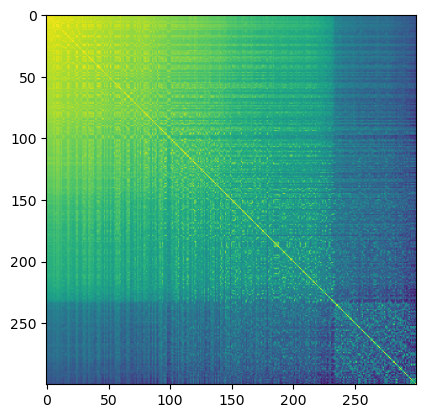

In [4637]:
plt.imshow(abs(K_ord))

In [4463]:
ords = ords.reindex(ords_r.index)

In [4464]:
# lengths = []
# evens = []
# evens_order = []
# for i,x in ords.iterrows():
#     lengths.append(len(factors[i]))
#     evens.append(len([j for j in factors[i] if j%2==0]))
#     evens_order.append(len([j for j in list(set(x.values))if j%2==0]))
    

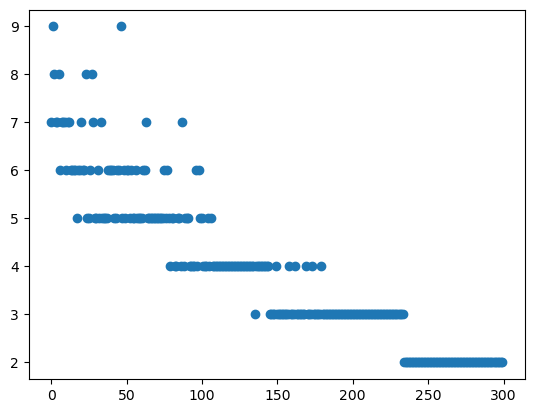

In [4468]:
plt.scatter(x = range(len([prime_factors(sp.totient(x)).count(2) for x in ords.index.values])), y=[prime_factors(sp.totient(x)).count(2) for x in ords.index.values])

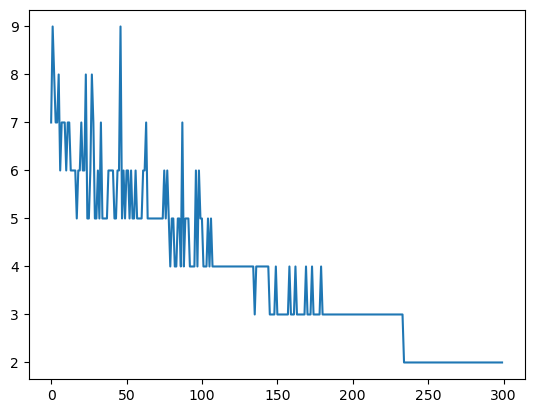

In [4469]:
plt.plot([prime_factors(sp.totient(x)).count(2) for x in ords.index.values])

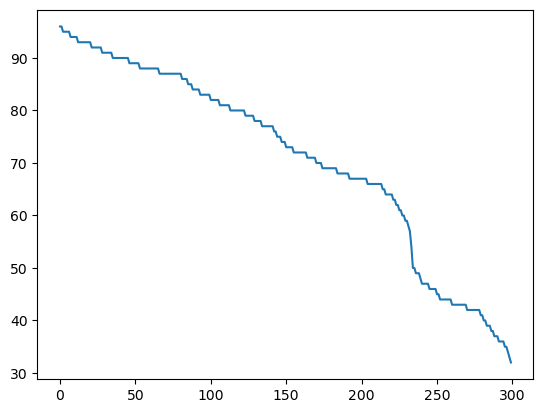

In [4470]:
plt.plot(abs(ords_r.apply(sum, axis=1)).sort_values(ascending=False).values)

In [4608]:
semiprimes_large = [x*y for x in primes for y in primes if x>y and x!=2 and y!=2] 

In [4609]:
lol_ = []
for i in semiprimes_large[:int(len(semiprimes_large)/2000)]:
    lol_.append(prime_factors(sp.totient(i)).count(2))

In [4616]:
pd.DataFrame(lol_).to_csv("./data_OF/evenness_of_totient")

In [4617]:
np.unique(lol_, return_counts=True)

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 array([5886, 6104, 4258, 2706, 1516, 1015,  633,  490,  220,   94,   40,
          18,    9,    4,    1], dtype=int64))

Text(0.5, 1.0, 'Evenness of totient functions in range (2,1000000)')

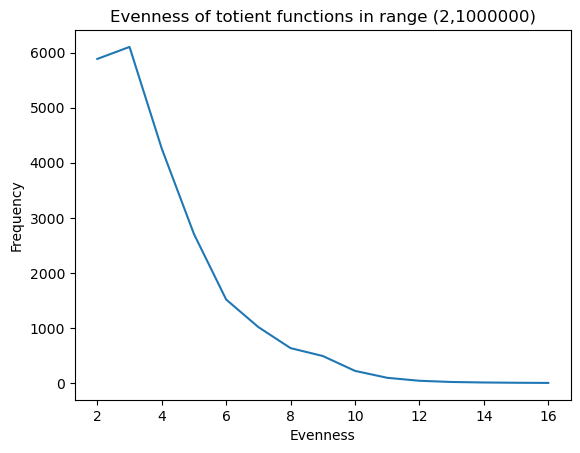

In [4618]:
plt.plot(np.unique(lol_, return_counts=True)[0], np.unique(lol_, return_counts=True)[1])
plt.xlabel("Evenness")
plt.ylabel("Frequency")
plt.title("Evenness of totient functions in range (2,1000000)")

In [4614]:
np.unique(lol_, return_counts=True)[1][:2].sum()

11990

In [ ]:
np.unique(lol_, return_counts=True)[1][2:].sum()

11004

In [4612]:
np.median(lol_)

3.0

In [4476]:
def rule_second(n):
    #MAX = int(np.log2(sp.totient(n)))
    evenness = prime_factors(sp.totient(n)).count(2)
    if (evenness >= 4):
        return 1
    else:
        return -1

In [4486]:
#semiprimes_test = [x*y for x in primes[5:500] for y in primes[5:500] if x>y] 
#semiprimes_test = np.array(semiprimes_test)[args]

In [4479]:
semiprimes_labels = [rule_second(x) for x in ords.index.values]

In [4480]:
semiprimes_labels = np.array(semiprimes_labels)

In [4481]:
args = semiprimes_labels.argsort()

In [4482]:
semiprimes_labels = semiprimes_labels[args]

In [4483]:
np.unique(semiprimes_labels, return_counts=True)

(array([-1,  1]), array([150, 150], dtype=int64))

In [4487]:
idx_jumbled = ords.index.values[args]

In [4488]:
ords_labelled = ords.reindex(idx_jumbled)

In [4623]:
ords_labelled.to_csv("./data_OF/ords_sorted_by_class.csv")

In [4489]:
ords_p = ords_labelled.applymap(parity_2)

In [4490]:
K_ord = pairwise_kernels(ords_p, ords_p)

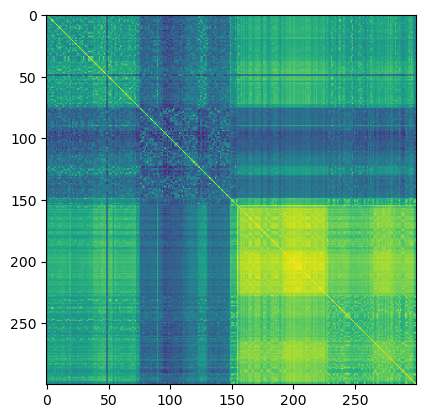

In [4491]:
plt.imshow(abs(K_ord))

In [4492]:
lookup = dict(zip(ords_labelled.index.values,range(len(ords_labelled.index.values))))

In [ ]:
ords_labelled

In [4493]:
def _brute_kernel(x1,x2, n):
    # a = ords_p.iloc[list(idx[ords_p.index]).index(x1)].values[:n]
    # b = ords_p.iloc[list(idx[ords_p.index]).index(x2)].values[:n]
    return np.abs(K_ord[lookup[x1[0]]][lookup[x2[0]]])
    
    #return np.abs(np.dot(a, b))

def helper(n):
    def brute_kernel(X, Y):
        K = np.zeros((X.shape[0], Y.shape[0]))
        for i in range(X.shape[0]):
            for j in range(Y.shape[0]):
                K[i][j] = _brute_kernel(X[i], Y[j], n)

        return K

    return brute_kernel

In [4526]:
scores_qke = []
for i in range(500):

    X_train, X_test, y_train, y_test = train_test_split(ords_labelled.index.values.reshape(-1,1), semiprimes_labels, test_size=0.33)

    clf = svm.SVC(kernel=helper(i))
    clf.fit(X_train, y_train)
    scores_qke.append(clf.score(X_test, y_test))


In [4527]:
np.mean(scores_qke)

0.9824242424242424

In [4528]:
np.max(scores_qke)

1.0

In [4529]:
np.min(scores_qke)

0.9393939393939394

In [ ]:
pd.DataFrame(scores).apply(np.std, axis=1)

(array([  4.,   0.,   0.,   3.,   0.,   0.,  27.,   0.,   0.,   0.,  89.,
          0.,   0., 145.,   0.,   0., 166.,   0.,   0.,  66.]),
 array([0.93939394, 0.94242424, 0.94545455, 0.94848485, 0.95151515,
        0.95454545, 0.95757576, 0.96060606, 0.96363636, 0.96666667,
        0.96969697, 0.97272727, 0.97575758, 0.97878788, 0.98181818,
        0.98484848, 0.98787879, 0.99090909, 0.99393939, 0.9969697 ,
        1.        ]),
 <BarContainer object of 20 artists>)

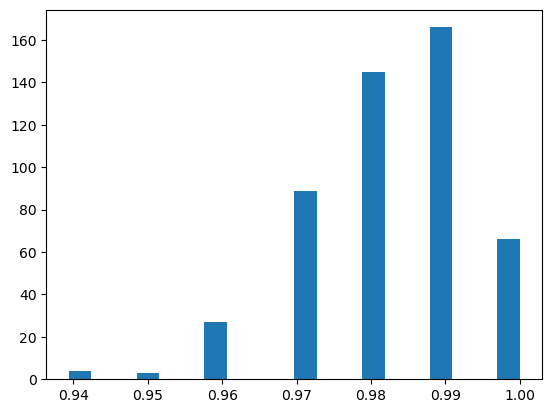

In [4549]:
plt.hist(scores_qke, bins=20)

In [4561]:
pd.DataFrame(scores_qke).to_csv("./data_OF/scores_quantum")

In [4522]:
dim = 500

scores = np.zeros((4,dim))

for i in range(dim):

    X_train, X_test, y_train, y_test = train_test_split(ords_labelled.index.values.reshape(-1,1), semiprimes_labels, test_size=0.33)

    # Linear SVC
    clf = make_pipeline(StandardScaler(),
                        LinearSVC(random_state=0, tol=1e-5))
    clf.fit(X_train, y_train)
    scores[0][i] = clf.score(X_test, y_test)
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    scores[1][i] = clf.score(X_test, y_test)
    
    clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=10, max_iter=3000000).fit(X_train, y_train)
    scores[2][i] = clf.score(X_test, y_test)
    

    clf = RandomForestClassifier(max_depth=200, random_state=0)
    clf.fit(X_train, y_train)

    scores[3][i] = clf.score(X_test, y_test)

In [4523]:
pd.DataFrame(scores).apply(np.mean, axis=1)

0    0.522040
1    0.497919
2    0.497091
3    0.461960
dtype: float64

In [4519]:
pd.DataFrame(scores).apply(np.mean, axis=1)

0    0.512525
1    0.489293
2    0.492121
3    0.454545
dtype: float64

In [4524]:
pd.DataFrame(scores).apply(np.max, axis=1)

0    0.646465
1    0.616162
2    0.616162
3    0.585859
dtype: float64

In [4525]:
pd.DataFrame(scores).apply(np.min, axis=1)

0    0.383838
1    0.383838
2    0.383838
3    0.343434
dtype: float64

In [4532]:
scores

array([[0.47474747, 0.54545455, 0.50505051, ..., 0.51515152, 0.54545455,
        0.58585859],
       [0.52525253, 0.50505051, 0.52525253, ..., 0.46464646, 0.51515152,
        0.49494949],
       [0.47474747, 0.49494949, 0.52525253, ..., 0.46464646, 0.48484848,
        0.50505051],
       [0.52525253, 0.49494949, 0.48484848, ..., 0.44444444, 0.49494949,
        0.45454545]])

In [4537]:
pd.DataFrame(scores).apply(np.std, axis=1)

0    0.041101
1    0.038399
2    0.038674
3    0.042959
dtype: float64

(array([ 2.,  0.,  0., 13., 11., 10., 43., 31., 36., 41., 86., 57., 52.,
        62., 18., 18., 16.,  2.,  1.,  1.]),
 array([0.38383838, 0.3969697 , 0.41010101, 0.42323232, 0.43636364,
        0.44949495, 0.46262626, 0.47575758, 0.48888889, 0.5020202 ,
        0.51515152, 0.52828283, 0.54141414, 0.55454545, 0.56767677,
        0.58080808, 0.59393939, 0.60707071, 0.62020202, 0.63333333,
        0.64646465]),
 <BarContainer object of 20 artists>)

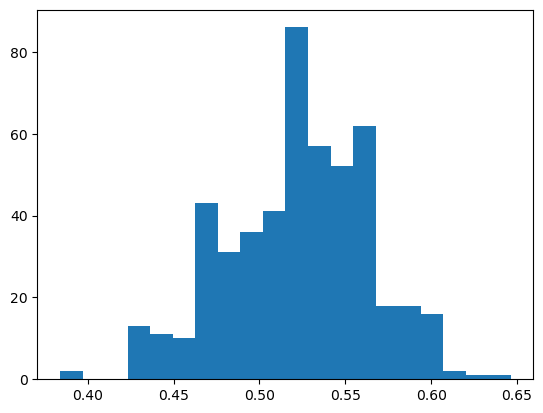

In [4542]:
plt.hist(scores[0],bins=20)

In [4556]:
scores = pd.read_csv("./data_OF/scores_classical").set_index("Unnamed: 0")

In [4559]:
scores.apply(np.mean, axis=1)

Unnamed: 0
0    0.522040
1    0.497919
2    0.497091
3    0.461960
dtype: float64

# Larger samples

In [ ]:
semiprimes_large = [x*y for x in primes[30:60] for y in primes[30:60] if x>y] 

In [4019]:
ords_large, idx_large = generate_dataset(semiprimes_large, 10)

In [4020]:
min(semiprimes_large)

In [4021]:
max(semiprimes_large)

In [4022]:
ords_large = pd.DataFrame(ords_large)

In [4023]:
ords_large.index = [int(x) for x in idx_large]

In [4024]:
ords_large

In [4025]:
ords_large.to_csv("ords10_large.csv")

In [4026]:
ords_large_p = ords_large.applymap(parity_2)

In [4027]:
ords_large_r = ords_large_p.reindex(abs(ords_large_p.apply(sum, axis=1)).sort_values(ascending=False).index)

In [4028]:
K_ord_large = pairwise_kernels(ords_large_r, ords_large_r)

In [4029]:
plt.imshow(abs(K_ord_large))

In [4030]:
plt.plot([prime_factors(sp.totient(x)).count(2) for x in ords_large_r.index.values])

In [4031]:
plt.plot(abs(ords_large_r.apply(sum, axis=1)).sort_values(ascending=False).values)

In [4059]:
semiprimes_labels = [rule_second(x) for x in semiprimes_large]

In [4060]:
semiprimes_labels = np.array(semiprimes_labels)

In [4061]:
args = semiprimes_labels.argsort()

In [4062]:
semiprimes_labels = semiprimes_labels[args]

In [4063]:
np.unique(semiprimes_labels, return_counts=True)

In [4064]:
idx_jumbled = ords_large.index.values[args]

In [4065]:
ords_labelled = ords_large.reindex(idx_jumbled)

In [4070]:
ords_labelled = ords_labelled[61:]

In [4071]:
ords_p = ords_labelled.applymap(parity_2)

In [4072]:
K_ord = pairwise_kernels(ords_p, ords_p)

In [4073]:
plt.imshow(abs(K_ord))

In [4074]:
lookup = dict(zip(ords_labelled.index.values,range(len(ords_labelled.index.values))))

In [4075]:
def _brute_kernel(x1,x2, n):
    # a = ords_p.iloc[list(idx[ords_p.index]).index(x1)].values[:n]
    # b = ords_p.iloc[list(idx[ords_p.index]).index(x2)].values[:n]
    return np.abs(K_ord[lookup[x1[0]]][lookup[x2[0]]])
    
    #return np.abs(np.dot(a, b))

def helper(n):
    def brute_kernel(X, Y):
        K = np.zeros((X.shape[0], Y.shape[0]))
        for i in range(X.shape[0]):
            for j in range(Y.shape[0]):
                K[i][j] = _brute_kernel(X[i], Y[j], n)

        return K

    return brute_kernel

In [4077]:
scores_qke = []
for i in range(10):

    X_train, X_test, y_train, y_test = train_test_split(ords_labelled.index.values.reshape(-1,1), semiprimes_labels[61:], test_size=0.33)

    clf = svm.SVC(kernel=helper(i))
    clf.fit(X_train, y_train)
    scores_qke.append(clf.score(X_test, y_test))


In [4078]:
np.mean(scores_qke)

In [4079]:
np.max(scores_qke)

In [4080]:
np.min(scores_qke)

In [4110]:
semiprimes_large = [x*y for x in primes[30:300] for y in primes[30:300] if x>y] 

In [4111]:
semiprimes_labels = [rule_second(x) for x in semiprimes_large]

In [4112]:
semiprimes_labels = np.array(semiprimes_labels)

In [4113]:
args = semiprimes_labels.argsort()

In [4114]:
semiprimes_labels = semiprimes_labels[args]

In [4115]:
np.unique(semiprimes_labels, return_counts=True)

In [4120]:
semiprimes_large = np.array(semiprimes_large)[args]

In [4122]:
dim = 50

scores = np.zeros((4,dim))

for i in range(dim):

    X_train, X_test, y_train, y_test = train_test_split(semiprimes_large.reshape(-1,1), semiprimes_labels, test_size=0.33)

    # Linear SVC
    clf = make_pipeline(StandardScaler(),
                        LinearSVC(random_state=0, tol=1e-5))
    clf.fit(X_train, y_train)
    scores[0][i] = clf.score(X_test, y_test)
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    scores[1][i] = clf.score(X_test, y_test)
    
    clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=10, max_iter=3000000).fit(X_train, y_train)
    scores[2][i] = clf.score(X_test, y_test)
    print(i)

#     clf = RandomForestClassifier(max_depth=200, random_state=0)
#     clf.fit(X_train, y_train)

#     scores[3][i] = clf.score(X_test, y_test)
    


#maximum 0.66

In [4123]:
pd.DataFrame(scores).apply(np.mean, axis=1)

In [4124]:
pd.DataFrame(scores).apply(np.max, axis=1)

In [4125]:
pd.DataFrame(scores).apply(np.min, axis=1)

In [ ]:
ord

# Effect of increasing feature size

In [4227]:
ords = pd.read_csv("ords100.csv")

In [4228]:
ords = ords.set_index("Unnamed: 0")

In [4229]:
ords_p = ords.applymap(parity_2)

In [4230]:
ords_r = ords_p.reindex(abs(ords_p.apply(sum, axis=1)).sort_values(ascending=False).index)

In [4231]:
K_ord_large = pairwise_kernels(ords_r, ords_r)

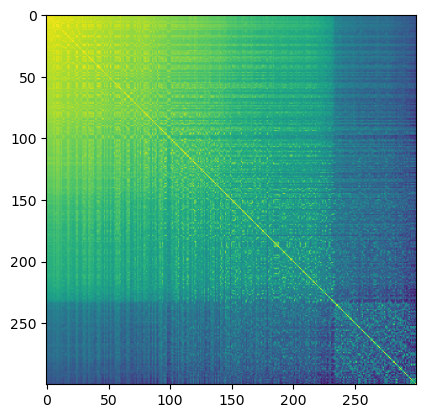

In [4232]:
plt.imshow(abs(K_ord_large))

In [4377]:
ords_r.index[-1]

1633

In [4378]:
prime_factors(sp.totient(ords_r.index[-1]))

[2, 2, 5, 7, 11]

In [4389]:
2*7*7*11

1078

In [4390]:
lol, idx_lol = generate_dataset([2*7*7*11], 2*7*7*11-1)

1


In [4391]:
lol = pd.DataFrame(lol)

In [4392]:
lol_p = lol.applymap(parity_2)

In [4393]:
lol_p

0     1     2     3     4     5     6     7     8     9     ...  1067  \
0     0    -1     0     1     0     1     0     0     0    -1  ...     0   

   1068  1069  1070  1071  1072  1073  1074  1075  1076  
0     0     1     0     0     0     1     0     1     0  

[1 rows x 1077 columns]

In [4356]:
for i,x in lol_p.iterrows():
    _, counts = np.unique(x.values, return_counts=True)
    print(counts[2]/(counts[0]+counts[2]))
    

0.9843561973525873


In [4346]:
for i,x in lol_p.iterrows():
    _, counts = np.unique(x.values, return_counts=True)
    print(counts[2]/(counts[0]+counts[2]))
    

0.9658119658119658


In [4339]:
for i,x in lol_p.iterrows():
    _, counts = np.unique(x.values, return_counts=True)
    print(counts[2]/(counts[0]+counts[2]))
    

0.9374660141381186


In [4322]:
for i,x in lol_p.iterrows():
    _, counts = np.unique(x.values, return_counts=True)
    print(counts[2]/(counts[0]+counts[2]))
    

0.8749052312357847


In [4383]:
for i,x in lol_p.iterrows():
    _, counts = np.unique(x.values, return_counts=True)
    print(counts[2]/(counts[0]+counts[2]))
    

0.7498375568551007


In [4394]:
for i,x in lol_p.iterrows():
    _, counts = np.unique(x.values, return_counts=True)
    print(counts[2]/(counts[0]+counts[2]))
    

0.7494033412887828


In [4294]:
factors = []
for i in range(1,sp.totient(pp)+1):
    if(sp.totient(pp)%i==0):
        factors.append(i)

factors = np.array(factors)
len(factors[factors%2==0])/(len(factors))

0.75

In [4362]:
lol = ([prime_factors(sp.totient(s)).count(2) for s in semiprimes_large])

In [3257]:
ords.to_csv("primeorders100.csv")

In [4369]:
dict(zip(*np.unique(lol, return_counts=True)))

{2: 9591,
 3: 9730,
 4: 6585,
 5: 4185,
 6: 2319,
 7: 1565,
 8: 1052,
 9: 728,
 10: 320,
 11: 135,
 12: 58,
 13: 27,
 14: 13,
 15: 6,
 16: 1}

In [3236]:
ords, idx = generate_dataset(primes[100:400], 100)

In [3238]:
ords = pd.DataFrame(ords)

In [3246]:
ords = ords.set_index(idx)

In [3247]:
ords_p = ords.applymap(parity_2)

In [3248]:
ords_r = ords_p.reindex(abs(ords_p.apply(sum, axis=1)).sort_values(ascending=False).index)

In [3249]:
K_ord = pairwise_kernels(ords_r, ords_r)

In [3250]:
plt.imshow(abs(K_ord))

In [3255]:
[prime_factors(x-1).count(2) for x in ords_r.index]